# **ANÁLISIS DE APPS DE GOOGLE PLAYSTORE**
*Claudia Botteon y Julieta Trapé*




## **INTRODUCCIÓN**

Esta presentación está destinada a mostrar información relevante para la toma de decisiones a los directivos de una empresa que desarrolla aplicaciones.

Se basa en un dataset de aplicaciones disponibles en Google Playstore que cuenta con más de 2 millones de registros correspondientes a junio de 2021.
En él se puede encontrar información sobre la puntuación, la cantidad de instalaciones, los precios, el público destinatario, los desarrolladores, etc. de distintas aplicaciones de Google Playstore.

*Fuente: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps*

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})
import seaborn as sns

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%cd "/content/gdrive/MyDrive/Curso_de_datos/11-Obtención de insights"

/content/gdrive/MyDrive/Curso_de_datos/11-Obtención de insights


In [ ]:
df = pd.read_csv('google_playstore_apps.csv',sep=',')


In [ ]:
# Sólo utilizamos los registros cuya moneda es dólar estadounidense.
df = df[df["Currency"]=="USD"]

# Conservamos las columnas relevantes para el análisis
df = df[["App Id","Category","Rating", "Maximum Installs", "Free", "Price", "Content Rating", "Ad Supported", "In App Purchases"]]

# Excluímos los Rating = 0 ya que en esa categoría se incluyen Apps que no han sido valoradas
df = df[df["Rating"]>0]

# Consideramos precios entre O y 15 dólares ya que la empresa tiene la política de no vender productos de más de 15 dólares.

df = df[df["Price"]<=15]

df.head()

,App Id,Category,Rating,Maximum Installs,Free,Price,Content Rating,Ad Supported,In App Purchases
1,com.webserveis.batteryinfo,Tools,4.4,7662,True,0.0,Everyone,True,False
3,cst.stJoseph.ug17ucs548,Communication,5.0,19,True,0.0,Everyone,True,False
6,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,2567,True,0.0,Everyone,True,False
7,com.mozaix.simoneboard,Lifestyle,2.0,702,True,0.0,Everyone,False,False
9,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,62433,True,0.0,Everyone,True,False


##**¿QUÉ OBJETIVO PERSEGUIMOS?**##

Analizar las características más distintitiva de las aplicaciones  disponibles en Google Playstore.





## **ANÁLISIS**

Este análisis está dirigido a responder las siguientes preguntas: 

* ¿Influye en la puntuación de la App el hecho de incluir o no publicidades dentro de ella?
* ¿Las Apps gratuitas tienen distinta puntuación que las de pago?
* ¿Los consumidores están dispuestos a pagar por las aplicaciones?
* ¿Las aplicaciones que incluyen compras dentro de ellas están mejores puntuadas que las que no incluyen?
* ¿Las aplicaciones gratuitas son las más descargadas?

El 98% de las Apps listadas en el dataframe son gratuitas, tal como se muestra en el Gráfico 1.
Sin embargo, el Gráfico 2 permite visualizar que las Apps gratuitas y de pago no tienen puntuaciones significativamente distintas entre sí. Por lo tanto la gratuidad de una App no deriva en una mala puntuación. Es por eso que se recomienda no tener en cuenta este aspecto en el diseño de nuevas aplicaciones.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1228909.0,4.100832,6.891195e-01,1.0,3.8,4.2,4.6,5.000000e+00
Maximum Installs,1228909.0,601024.584591,3.231103e+07,0.0,1269.0,5644.0,33552.0,1.205763e+10
Price,1228909.0,0.063806,5.823757e-01,0.0,0.0,0.0,0.0,1.500000e+01


In [ ]:
df_free = df[df["Free"]==True]
df_free.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1204309.0,4.099865,6.904021e-01,1.0,3.8,4.2,4.6,5.000000e+00
Maximum Installs,1204309.0,612696.807334,3.263923e+07,0.0,1307.0,5787.0,34473.0,1.205763e+10
Price,1204309.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00


In [ ]:
df_paid = df[df["Free"]==False]
df_paid.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,24600.0,4.148154,0.621283,1.000000,3.90,4.30,4.60,5.0
Maximum Installs,24600.0,29603.328496,335233.221351,0.000000,422.00,1551.00,7984.00,36183322.0
Price,24600.0,3.187487,2.643220,0.207889,1.01,1.99,3.99,15.0


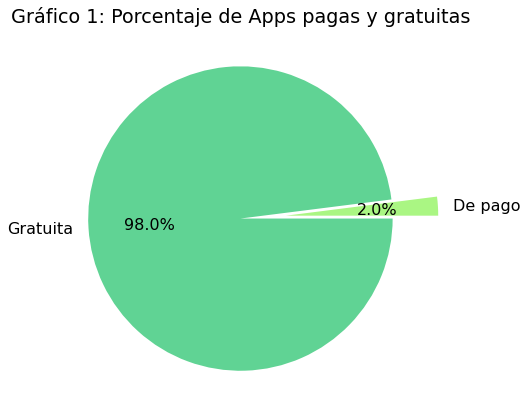

In [ ]:
by_free = df.groupby("Free")["App Id"].count()
by_free.index = ["De pago","Gratuita"]

# Elaboramos el Gráfico 1
fig,ax = plt.subplots(figsize =(10, 7))
colores = ["#AAF683","#60D394"]
desfase = (0.3, 0)
ax.pie(by_free, labels = by_free.index, autopct = "%1.1f%%", colors=colores, explode = desfase)
ax.set_title("Gráfico 1: Porcentaje de Apps pagas y gratuitas")
plt.show()

In [ ]:
#Probamos hacer el gráfico anterior con la librería Plotly.express
import plotly.express as px
import plotly.graph_objects as go
colores = ["#60D394","#AAF683"]
#fig = px.pie(values=by_free, names=by_free.index, color_discrete_sequence=colores)

fig = go.Figure(data=[go.Pie(values=by_free, labels=by_free.index, pull=[0.2, 0])], layout = {"piecolorway":colores})

fig.show()

Text(0.5, 0, 'Modo de acceso')

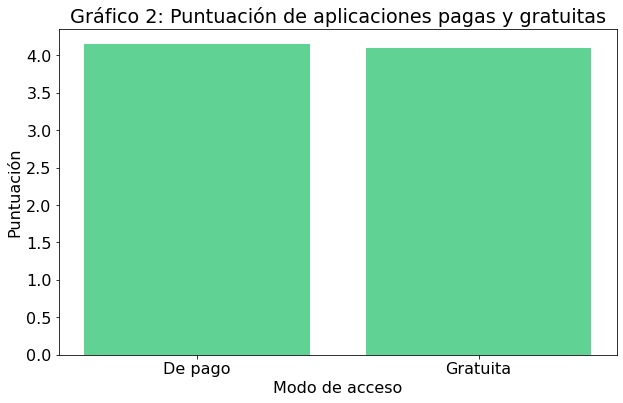

In [ ]:
by_free = df.groupby("Free")["Rating"].mean()
by_free.index = ["De pago","Gratuita"]

# Elaboramos el Gráfico 2
fig, ax = plt.subplots(figsize=(10,6))
colores = "#60D394"
ax.bar(by_free.index, by_free, color=colores)
ax.set_title('Gráfico 2: Puntuación de aplicaciones pagas y gratuitas')
ax.set_ylabel('Puntuación')
ax.set_xlabel('Modo de acceso')

In [58]:
by_free

De pago     4.148154
Gratuita    4.099865
Name: Rating, dtype: float64

Dado que la gratuidad no está relacionada con la puntación, es necesario analizar otros aspectos que podrían influir en qué tan bien puntuada resulta la App. 

El Gráfico 3 permite observar que las Apps más caras tienen buenas puntuaciones, mientras que las más baratas presentan una mayor dispersión en su rating, encontrándose desde Apps bien puntuadas hasta Apps con baja puntuación. 

Aun cuando no existe una correlación entre ambas variables, el elevado precio de las Apps más caras puede estar relacionado a una gran inversión en el desarrollo de las mismas. Dicho nivel de inversión posiblemente garantice una buena calidad de producto. En este sentido, se recomienda evaluar el nivel de inversión a destinar en la fase de desarrollo.

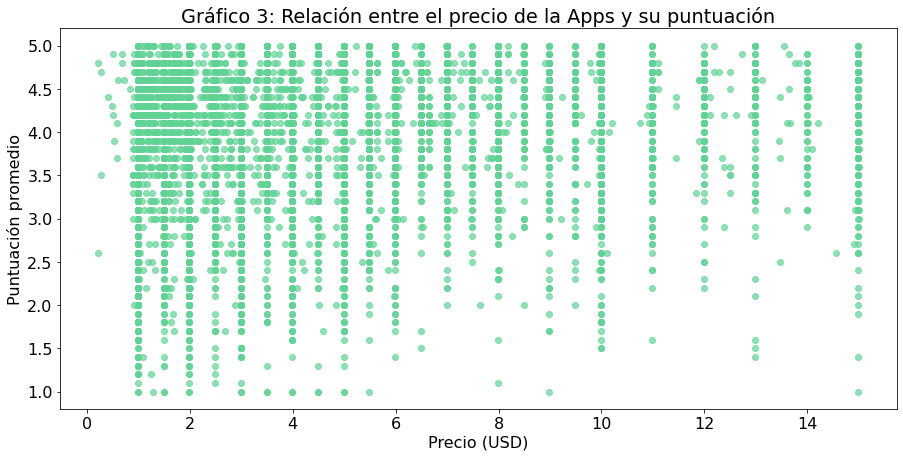

In [ ]:
df_paid = df[df["Price"] != 0.0]

# Elaboramos el Gráfico 3
fig,ax = plt.subplots(figsize =(15, 7))
colores = "#60D394"
ax.scatter(df_paid["Price"], df_paid["Rating"], alpha=0.7, color= colores) 
ax.set_title('Gráfico 3: Relación entre el precio de la Apps y su puntuación')
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Puntuación promedio')
plt.show()

Si bien se recomienda evaluar una inversión significativa tanto de dinero como de esfuerzo al desarrollar una Apps, se observó que los usuarios tienen una marcada preferencia para instalar Apps gratuitas con relación a las pagas. Como el público destinatario prefiere pagar bajos precios o nulos por las aplicaciones, para que el producto tenga éxito es necesario identificar fuentes de financiación alternativas para generar ganancias.

Una primera opción es incluir publicidades dentro de la App. El Gráfico 4 muestra que la incorporación de las mismas no impacta negativamente en la puntuación asignada por los usuarios.

Otra alternativa es introducir compras dentro de la App. El Gráfico 5 indica que hacerlo no influye significativamente sobre la puntuación de la misma.



Text(0.5, 0, 'Publicidades incorporadas')

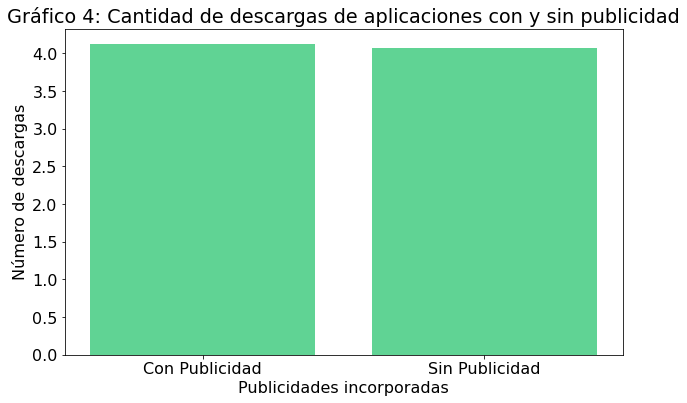

In [ ]:
by_Ad = df.groupby("Ad Supported")["Rating"].mean().sort_values(axis = 0, ascending = False)
by_Ad.index = ["Con Publicidad","Sin Publicidad"]

# Elaboramos el Gráfico 4.
fig, ax = plt.subplots(figsize=(10,6))
colores = "#60D394"
ax.bar(by_Ad.index, by_Ad, color = colores)
ax.set_title('Gráfico 4: Cantidad de descargas de aplicaciones con y sin publicidad')
ax.set_ylabel('Número de descargas')
ax.set_xlabel('Publicidades incorporadas')

In [ ]:
by_Ad

Con Publicidad    4.122154
Sin Publicidad    4.072147
Name: Rating, dtype: float64

(0.0, 5.0)

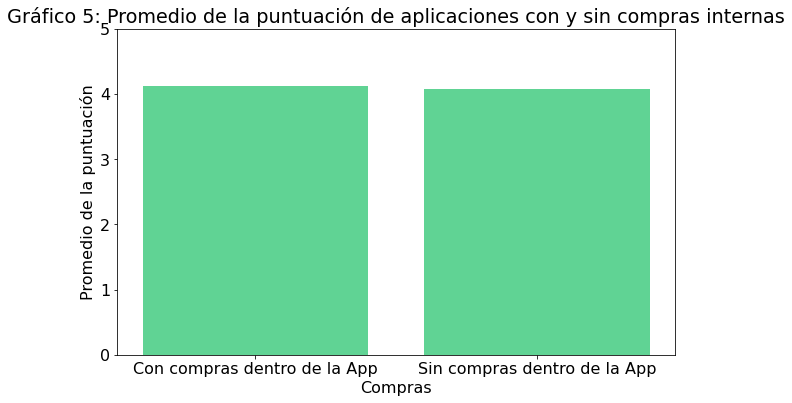

In [ ]:
by_Purchase = df.groupby("In App Purchases")["Rating"].mean().sort_values(axis = 0, ascending = False)
by_Purchase.index = ["Con compras dentro de la App","Sin compras dentro de la App"]

# Elaboramos el Gráfico 5
fig, ax = plt.subplots(figsize=(10,6))
colores = "#60D394"
ax.bar(by_Purchase.index, by_Ad, color = colores)
ax.set_title('Gráfico 5: Promedio de la puntuación de aplicaciones con y sin compras internas')
ax.set_ylabel('Promedio de la puntuación')
ax.set_xlabel('Compras')
plt.ylim(0,5)

In [ ]:
by_Purchase

Con compras dentro de la App    4.104461
Sin compras dentro de la App    4.075610
Name: Rating, dtype: float64

##**INSIGHTS Y RECOMENDACIONES**##

##Insights##

Se observó que los usuarios tienen una marcada preferencia para instalar Apps gratuitas con relación a las pagas, aún cuando su precio sea menor o igual a 15 dólares. A su vez, no existe una correlación entre el precio de una App y su puntuación.

Sumado a esto, el análisis muestra que la inclusión de publicidades y/o compras dentro de una aplicación no influye en la puntuación que los usuarios le asignan.

##Recomendaciones

Si bien se debe evaluar una inversión significativa tanto de dinero como de esfuerzo al desarrollar una App, dado los resultados obtenidos a partir del análisis exploratorio se recomienda lanzar al mercado aplicaciones gratuitas.

En caso de requerir financiación para el desarrollo y mantenimiento de una nueva aplicación, es recomendable considerar la inclusión de publicidades y/o compras dentro de la misma que puedan funcionar como fuente de ingresos.
